In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
Airlines=pd.read_excel('/EastWestAirlines.xlsx',sheet_name='data')

In [5]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
# finding the best k-value

In [7]:
# Normalization

In [8]:
from sklearn.preprocessing import normalize

In [10]:
Airline2=Airlines.drop(['ID#'],axis=1)

In [11]:
Airline3=pd.DataFrame(normalize(Airline2),columns=Airline2.columns)

In [12]:
Airline3.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009


In [17]:
# Finding the optimum no. of cluster
from sklearn.cluster import KMeans

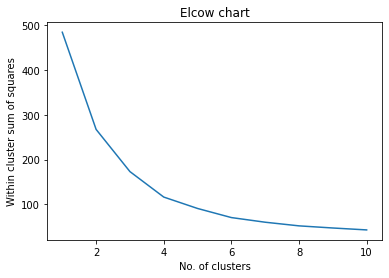

In [20]:
from pandas.core.common import random_state
x=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(Airline3)
  x.append(kmeans.inertia_)

plt.plot(range(1,11),x)
plt.title('Elcow chart')
plt.xlabel('No. of clusters')
plt.ylabel('Within cluster sum of squares')
plt.show()

In [21]:
# let us take k=5
# generally go as per the customer need of clusters

In [22]:
# Cluster algorithm

In [27]:
cluster_algorithm=KMeans(5,random_state=42)
cluster_algorithm.fit(Airline3)

KMeans(n_clusters=5, random_state=42)

In [28]:
Airline3['Cluster']=cluster_algorithm.labels_
Airline3


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000,2
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000,1
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000,2
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000,1
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049,0
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016,2
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013,0
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000,2


In [31]:
Airline3.groupby('Cluster').agg(['mean']).reset_index()

,Cluster,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,0.891019,0.001968,0.000058,0.000030,0.000029,0.422473,0.000406,0.007782,0.000023,0.082956,0.000010
1,1,0.892937,0.004465,0.000124,0.000124,0.000124,0.075837,0.000294,0.006321,0.000021,0.407924,0.000014
2,2,0.987434,0.003397,0.000035,0.000030,0.000030,0.090991,0.000154,0.006632,0.000021,0.075500,0.000004
3,3,0.514097,0.002464,0.000096,0.000050,0.000049,0.802765,0.000521,0.017969,0.000061,0.136724,0.000031
4,4,0.414645,0.000000,0.000229,0.000228,0.000228,0.150767,0.000598,0.007354,0.000028,0.848268,0.000039


In [32]:
Airlines['Cluster']=cluster_algorithm.labels_
Airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [33]:
Airlines.groupby('Cluster').agg(['mean']).reset_index()

,Cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2054.755756,70955.678679,114.680681,3.143143,1.026026,1.020020,32712.445445,17.696697,447.920921,1.323323,4050.885886,0.490490
1,1,1565.082687,11756.307494,55.263566,1.005168,1.000000,1.000000,980.863049,3.444444,93.457364,0.294574,4910.258398,0.173127
2,2,2106.209670,97159.332404,185.770804,1.606695,1.009298,1.001860,9639.506741,9.706648,518.477917,1.559740,3959.041376,0.270572
3,3,1943.176638,27462.797721,116.148148,3.245014,1.034188,1.071225,41806.162393,17.572650,670.883191,1.945869,4224.609687,0.903134
4,4,1678.945946,2415.576577,0.000000,1.009009,1.000000,1.000000,850.189189,3.036036,48.612613,0.171171,4723.225225,0.225225
